In [9]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from google.colab import drive, files
import matplotlib.pyplot as plt

In [10]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
DATA_PATH = '/content/drive/My Drive/MAGA/NLP/Lab1/'

In [12]:
labeled_data = pd.read_csv(DATA_PATH + "labeled_data.csv")

In [13]:
df = labeled_data[['class', 'tweet']]

In [14]:
df

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [15]:
import re
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
stopword.add("rt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


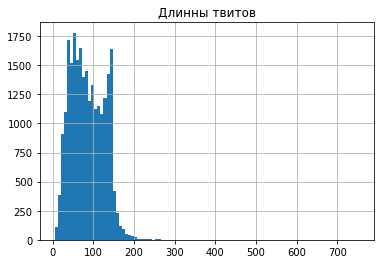

In [16]:
labeled_data.tweet.apply(lambda x: len(x)).hist(bins=100)
plt.title('Длинны твитов')
plt.show()

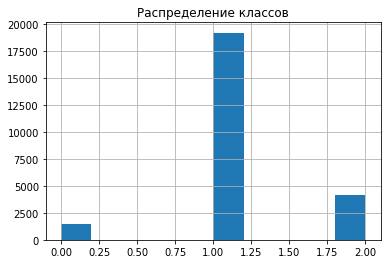

In [17]:
df["class"].hist()
plt.title('Распределение классов')
plt.show()

In [18]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [19]:
df['tweet']=df['tweet'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df['tweet']

0         mayasolov woman shouldnt complain clean hous ...
1           boy dat coldtyga dwn bad cuffin dat hoe  place
2         urkindofbrand dawg  ever fuck bitch start cri...
3                      cganderson vivabas look like tranni
4         shenikarobert shit hear might true might fake...
                               ...                        
24778    yous muthafin lie   coreyemanuel right tl tras...
24779    youv gone broke wrong heart babi drove redneck...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffl  ntac eileen dahlia  beauti color combin...
Name: tweet, Length: 24783, dtype: object

In [21]:
print("Before:", labeled_data['tweet'].iloc[0])
print("Афтэ:", df['tweet'].iloc[0])

Before: !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
Афтэ:  mayasolov woman shouldnt complain clean hous amp man alway take trash


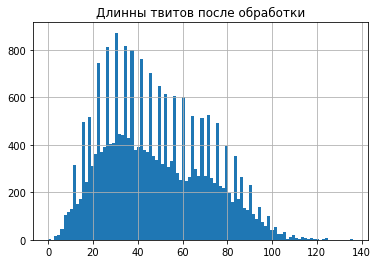

In [22]:
df.tweet.apply(lambda x: len(x)).hist(bins=100)
plt.title('Длинны твитов после обработки')
plt.show()

In [23]:
from wordcloud import WordCloud, STOPWORDS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


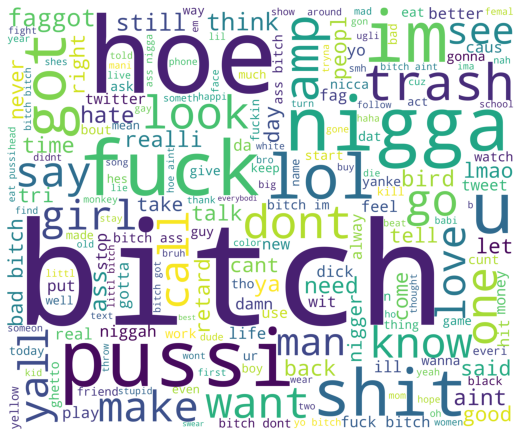

In [24]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

corpus = get_corpus(df['tweet'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

каеф)

## Classic ML

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [26]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(df['tweet'], df['class'], random_state=42)
print(len(X_train), len(y_train))
print(len(x_test), len(y_test))

18587 18587
6196 6196


In [27]:
sgd_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', SGDClassifier(random_state=42))])
knb_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knb_clf', KNeighborsClassifier(n_neighbors=10))])
cv_sgd_ppl_clf = Pipeline([
    ('cv', CountVectorizer(stop_words="english")),
    ('sgd_clf', SGDClassifier(random_state=42))])
cv_knb_ppl_clf = Pipeline([
    ('cv', CountVectorizer(stop_words="english")),
    ('knb_clf', KNeighborsClassifier(n_neighbors=10))])
sgd_ppl_clf.fit(X_train, y_train)
knb_ppl_clf.fit(X_train, y_train)
cv_sgd_ppl_clf.fit(X_train, y_train)
cv_knb_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer(stop_words='english')),
                ('knb_clf', KNeighborsClassifier(n_neighbors=10))])

In [28]:
predicted_sgd = sgd_ppl_clf.predict(x_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           0       0.13      0.55      0.21        86
           1       0.96      0.92      0.94      5008
           2       0.86      0.81      0.84      1102

    accuracy                           0.89      6196
   macro avg       0.65      0.76      0.66      6196
weighted avg       0.93      0.89      0.91      6196



In [29]:
predicted_sgd = knb_ppl_clf.predict(x_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           0       0.22      0.43      0.29       183
           1       0.95      0.84      0.89      5402
           2       0.43      0.74      0.55       611

    accuracy                           0.82      6196
   macro avg       0.53      0.67      0.58      6196
weighted avg       0.88      0.82      0.84      6196



In [30]:
predicted_sgd = cv_sgd_ppl_clf.predict(x_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           0       0.24      0.43      0.31       202
           1       0.95      0.92      0.94      4915
           2       0.85      0.82      0.84      1079

    accuracy                           0.89      6196
   macro avg       0.68      0.73      0.69      6196
weighted avg       0.91      0.89      0.90      6196



In [31]:
predicted_sgd = cv_knb_ppl_clf.predict(x_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           0       0.34      0.44      0.39       281
           1       0.95      0.87      0.91      5201
           2       0.57      0.83      0.67       714

    accuracy                           0.85      6196
   macro avg       0.62      0.71      0.66      6196
weighted avg       0.88      0.85      0.86      6196



## 2NN

In [32]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 14.6 MB/s 
     |████████████████████████████████| 7.6 MB 48.0 MB/s 
     |████████████████████████████████| 163 kB 69.5 MB/s 


In [33]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from transformers import BertModel

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [35]:
import torch
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = {'hate':0,
          'mid-hate':1,
          'no-hate':2,
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [label for label in df['class']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['tweet']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [36]:
class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 5)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [37]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
                  

In [38]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')

In [39]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

19826 2478 2479


In [40]:
EPOCHS = 5
model = BertClassifier()
LR = 1e-6
              
train(model, df_train, df_val, LR, EPOCHS)

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 9913/9913 [36:20<00:00,  4.55it/s]


Epochs: 1 | Train Loss:  0.227                 | Train Accuracy:  0.856                 | Val Loss:  0.149                 | Val Accuracy:  0.906


100%|██████████| 9913/9913 [36:18<00:00,  4.55it/s]


Epochs: 2 | Train Loss:  0.139                 | Train Accuracy:  0.905                 | Val Loss:  0.141                 | Val Accuracy:  0.900


100%|██████████| 9913/9913 [36:09<00:00,  4.57it/s]


Epochs: 3 | Train Loss:  0.113                 | Train Accuracy:  0.922                 | Val Loss:  0.143                 | Val Accuracy:  0.902


100%|██████████| 9913/9913 [35:59<00:00,  4.59it/s]


Epochs: 4 | Train Loss:  0.087                 | Train Accuracy:  0.942                 | Val Loss:  0.150                 | Val Accuracy:  0.903


100%|██████████| 9913/9913 [36:31<00:00,  4.52it/s]


Epochs: 5 | Train Loss:  0.062                 | Train Accuracy:  0.958                 | Val Loss:  0.165                 | Val Accuracy:  0.900


In [41]:
evaluate(model, df_test)

Test Accuracy:  0.906
